In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle
from sklearn.linear_model import LogisticRegression

In [2]:
#Read The Dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Check Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Check null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#Check duplicates
df.duplicated().sum()

0

In [6]:
#Describe in statistics format
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Conclusion
#Glucose,BloodPressure,SkinThickness,Insulin,BMI ->the minimum value is 0 but actucally this is wrong dataset and null data so that 
#fill the value by using imputation technique like mean , median , mode.

df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())

In [9]:
#Again check 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

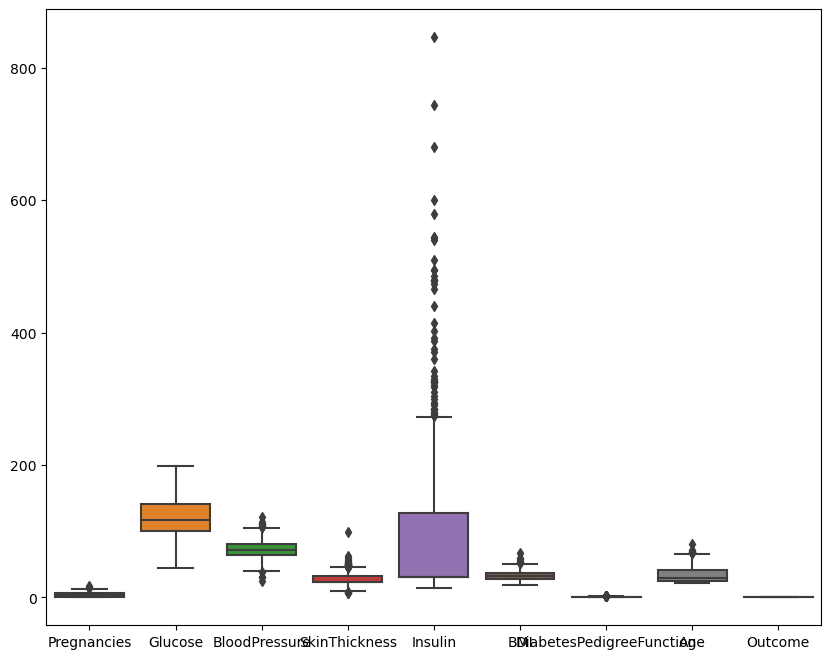

In [11]:
#Plot box diagram
plt.subplots(figsize = (10,8))
sns.boxplot(data=df)

In [12]:
#Dataset Divided into dependent and independent 
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
#Divided into train and test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [16]:
x_train.shape,x_test.shape

((614, 8), (154, 8))

In [17]:
y_train.shape,y_test.shape

((614,), (154,))

In [20]:
#Scale the x_train and x_test dataset
scaler = StandardScaler()

In [22]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
x_train_scaled

array([[-0.52639686, -1.25688146, -0.01899526, ..., -0.05024677,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32605067,  0.8081742 , ..., -0.59858988,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57153617, -2.16963585, ..., -0.52643947,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69173419,  1.13904198, ...,  1.91224437,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.63802409, -0.01899526, ...,  1.45048175,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10612077,  1.96621144, ..., -1.42110454,
        -0.61552223, -1.03594038]])

In [24]:
x_test_scaled

array([[ 0.68185612, -0.79146606, -1.1770325 , ...,  0.23835487,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.32605067,  0.22915558, ...,  0.48366626,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.45902649, -0.68073083, ..., -0.22340775,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.89119794, -0.01899526, ...,  0.64239716,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.80424387, -0.18442915, ..., -0.62745004,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.58932103, -0.18442915, ...,  0.42594593,
         0.70068816,  0.53008521]])

In [18]:
#Check best parameter using hyperparameter tunning
parameter = {'penalty':('l1','l2','elasticnet',None),'C':[1,2,3,4],'solver':['lbfgs','liblinear','newton-cholesky','newton-cg']}

In [19]:
obj = GridSearchCV(LogisticRegression(),param_grid=parameter,cv=10)

In [25]:
obj.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky',
                                    'newton-cg']})

In [26]:
obj.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [27]:
#model traning
classifier = LogisticRegression(penalty='l1',C=1,solver='liblinear')

In [28]:
classifier.fit(x_train_scaled,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [29]:
classifier.intercept_

array([-0.8596419])

In [30]:
classifier.coef_

array([[ 0.21117672,  1.1306022 , -0.14904265,  0.03509425, -0.2125591 ,
         0.71210773,  0.20658812,  0.36950429]])

In [31]:
y_pred = classifier.predict(x_test_scaled)

In [32]:
classifier.predict_proba(x_test_scaled)

array([[0.75556879, 0.24443121],
       [0.81135293, 0.18864707],
       [0.88152191, 0.11847809],
       [0.83886105, 0.16113895],
       [0.52108892, 0.47891108],
       [0.60259629, 0.39740371],
       [0.98674534, 0.01325466],
       [0.59196879, 0.40803121],
       [0.43515529, 0.56484471],
       [0.22670686, 0.77329314],
       [0.76504913, 0.23495087],
       [0.09645699, 0.90354301],
       [0.65046176, 0.34953824],
       [0.72565069, 0.27434931],
       [0.92308709, 0.07691291],
       [0.61958954, 0.38041046],
       [0.87634237, 0.12365763],
       [0.9302962 , 0.0697038 ],
       [0.24792807, 0.75207193],
       [0.41431583, 0.58568417],
       [0.80686806, 0.19313194],
       [0.92785295, 0.07214705],
       [0.49381711, 0.50618289],
       [0.90815601, 0.09184399],
       [0.46009063, 0.53990937],
       [0.09896436, 0.90103564],
       [0.88314132, 0.11685868],
       [0.97100521, 0.02899479],
       [0.7454037 , 0.2545963 ],
       [0.89757204, 0.10242796],
       [0.

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [34]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [35]:
#Check accuracy 
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7662337662337663
[[82 17]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



<AxesSubplot: >

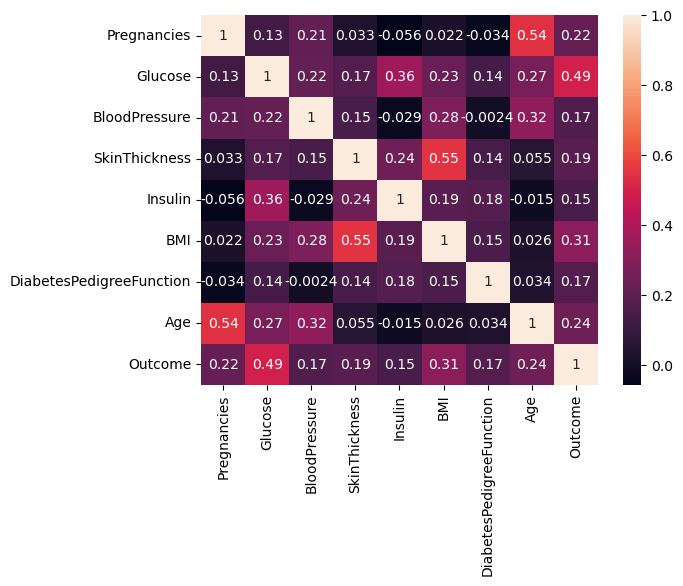

In [36]:
#Plot Heat map
sns.heatmap(df.corr(),annot=True)

In [39]:
#Check multucolinearity
def correlation(dataset,threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                corr_name = corr_matrix.columns[i]
                
                corr_col.add(corr_name)

    return corr_col

In [43]:
correlation(x_train,0.80)

set()

In [44]:
#Create pickel file
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(classifier,open('classifier.pkl','wb'))

In [45]:
#Load Pickel File
scaler1 = pickle.load(open('scaler.pkl','rb'))
classifier1 = pickle.load(open('classifier.pkl','rb'))

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [47]:
classifier1.predict(scaler1.transform([[6,148,72,35,30.5,33.6,0.627,50]]))

array([1])

In [48]:
classifier1.predict(scaler1.transform([[1,85,66,29,30.5,26.6,0.351,31]]))

array([0])